Task 5: Decision Tree on Titanic Dataset 
● Load Titanic dataset (or use a similar dataset). 

● Preprocess (handle missing values, encode categorical variables). 

● Train a DecisionTreeClassifier. 

● Visualize the decision tree using plot_tree. 

● Evaluate the model using accuracy and confusion matrix. 

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load dataset (from seaborn for convenience)
titanic = sns.load_dataset('titanic')

In [3]:
# Step 3: Preprocessing
# Drop rows with too many missing values and unneeded columns
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class'])

In [4]:
# Drop rows with missing values
titanic = titanic.dropna()

In [5]:
# Encode categorical variables
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [6]:
# Select features and target
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

In [7]:
# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 5: Train Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [9]:
# Step 6: Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [10]:
print("Accuracy:", round(accuracy, 4))
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7063
Confusion Matrix:
 [[67 13]
 [29 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        80
           1       0.72      0.54      0.62        63

    accuracy                           0.71       143
   macro avg       0.71      0.69      0.69       143
weighted avg       0.71      0.71      0.70       143



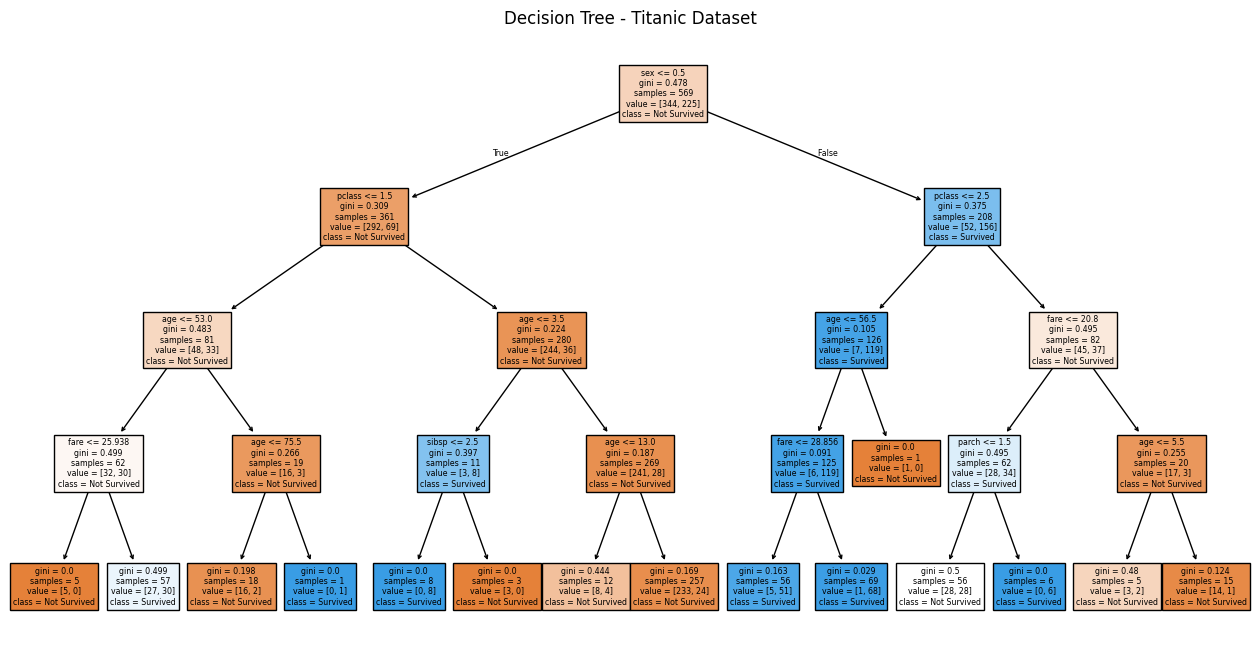

In [11]:
# Step 7: Visualize decision tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree - Titanic Dataset")
plt.show()
